In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer,r2_score
from sklearn.model_selection import train_test_split
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns


In [2]:
df=pd.read_csv('anime project.csv')
df

,anime_name,anime_id,type,episodes,score,rank,popularity,scored_by,likes,aired_from,aired_to,duration,Storyline
0,Cowboy Bebop,1,TV,26.0,8.77,32.0,44,713379.0,64780,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,"In the year 2071, humanity has colonized sever..."
1,Cowboy Bebop: Tengoku no Tobira,5,Movie,1.0,8.38,170.0,552,178460.0,1155,2001-09-01T00:00:00+00:00,NaN,1 hr 55 min,"Another day, another bounty—such is the life o..."
2,Trigun,6,TV,26.0,8.22,300.0,228,301980.0,12438,1998-04-01T00:00:00+00:00,1998-09-30T00:00:00+00:00,24 min per ep,"Vash the Stampede is the man with a $$60,000,0..."
3,Witch Hunter Robin,7,TV,26.0,7.26,2637.0,1605,37883.0,534,2002-07-02T00:00:00+00:00,2002-12-24T00:00:00+00:00,25 min per ep,Witches are individuals with special powers li...
4,Bouken Ou Beet,8,TV,52.0,6.96,3925.0,4651,5547.0,13,2004-09-30T00:00:00+00:00,2005-09-29T00:00:00+00:00,23 min per ep,It is the dark century and the people are suff...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,Rosario to Vampire,2993,TV,13.0,6.79,4647.0,241,346017.0,3129,2008-01-03T00:00:00+00:00,2008-03-27T00:00:00+00:00,25 min per ep,Youkai Academy is a seemingly normal boarding ...
2622,Death Note: Rewrite,2994,Special,2.0,7.69,1087.0,1020,77166.0,466,2007-08-31T00:00:00+00:00,2008-08-22T00:00:00+00:00,1 hr 52 min per ep,1. Genshisuru Kami (Visions of a God) A two ho...
2623,Hi no Tori: Houou-hen,2997,Movie,1.0,6.86,4346.0,8364,1159.0,5,1986-12-20T00:00:00+00:00,NaN,1 hr,"Akanemaru, a skilled sculptor, sets out to fin..."
2624,Hi no Tori: Uchuu-hen,2998,OVA,1.0,6.94,4021.0,8822,948.0,4,1987-12-21T00:00:00+00:00,NaN,48 min,"In deep space, four astronauts discover that t..."


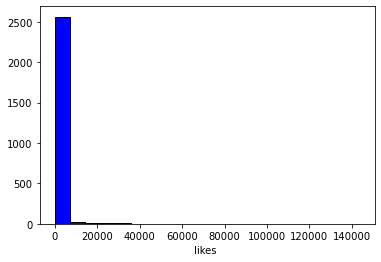

In [4]:
#Plotting distribution of target variable
plt.hist(df['likes'], color = 'blue', edgecolor = 'black',bins = int(20))
plt.xlabel('likes ')
plt.show()

In [5]:
#Checking for null values 
MVpercentages = (df.isnull().sum()/df.shape[0]).sort_values(ascending=False)
print(MVpercentages.head(10))

aired_to      0.320259
rank          0.087205
Storyline     0.007616
score         0.004570
scored_by     0.004570
episodes      0.002285
anime_name    0.000000
anime_id      0.000000
type          0.000000
popularity    0.000000
dtype: float64


In [6]:
#Looking for instances with null values in the rank column
NaN_rows = df[df['rank'].isnull()]
NaN_rows

,anime_name,anime_id,type,episodes,score,rank,popularity,scored_by,likes,aired_from,aired_to,duration,Storyline
163,Gosenzo San'e,188,OVA,4.0,6.09,NaN,8788,818.0,5,1998-09-25T00:00:00+00:00,1999-03-25T00:00:00+00:00,30 min per ep,Masquerade is the story surrounding the Hiraga...
178,Words Worth,203,OVA,5.0,6.75,NaN,5841,3266.0,31,1999-08-25T00:00:00+00:00,2000-11-25T00:00:00+00:00,28 min per ep,The legend has survived for generation. The Wo...
185,Pure Mail,211,OVA,2.0,6.24,NaN,8113,1284.0,13,2001-09-25T00:00:00+00:00,2001-12-21T00:00:00+00:00,29 min per ep,"Episode 1: ""There is no need for relationships..."
187,Pia Carrot e Youkoso!!,213,OVA,3.0,6.00,NaN,8180,1132.0,5,1997-10-24T00:00:00+00:00,1998-04-24T00:00:00+00:00,27 min per ep,Yusuke Kinoshita is forced by his father to wo...
188,Pia Carrot e Youkoso!! 2,214,OVA,3.0,6.12,NaN,9151,804.0,5,1998-10-23T00:00:00+00:00,1999-04-23T00:00:00+00:00,28 min per ep,Yusuke (from the first Pia Carrot series) retu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2612,Yuuwaku,2982,OVA,2.0,6.51,NaN,6613,2074.0,23,2003-07-25T00:00:00+00:00,2003-10-31T00:00:00+00:00,30 min per ep,"Unable to resist his animal urges, a professor..."
2617,Mahou Shoujo Ai,2988,OVA,5.0,6.52,NaN,5852,2595.0,31,2003-08-25T00:00:00+00:00,2005-02-25T00:00:00+00:00,27 min per ep,"In a certain town, there were consecutive phan..."
2618,Classmate no Okaasan,2989,OVA,2.0,6.01,NaN,6836,1826.0,11,2007-04-13T00:00:00+00:00,2007-07-13T00:00:00+00:00,28 min per ep,Jun is in his second year of high school. He l...
2619,Mini Skirt Gakuen,2990,OVA,1.0,4.43,NaN,10279,509.0,3,2001-12-21T00:00:00+00:00,NaN,19 min,Under the uniforms of this girls volleyball te...


In [7]:
#deleting instances with null values 
df.dropna(subset=['rank','score','scored_by'], inplace=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.shape

(2385, 13)

In [8]:
#Creating predictors and target variable 
X=df [['score','rank','popularity','scored_by']]
Y=df['likes']
Y=Y.values.reshape(-1,1)


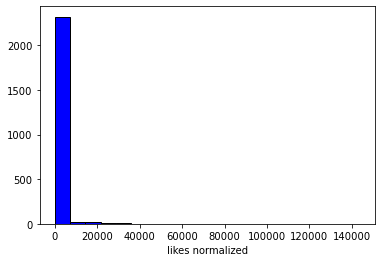

In [11]:
#Normalizing the distribution of the target variable likes 
scaler=StandardScaler()
Y=scaler.fit_transform(Y)
X=scaler.fit_transform(X)
plt.hist(df['likes'], color = 'blue', edgecolor = 'black',
         bins = int(20))
plt.xlabel('likes normalized')
plt.show()

In [12]:
#Performing a train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [14]:
#1st model with a simple multivariate linear regression 
model1=LinearRegression()
model1.fit(X_train,Y_train)
Y_pred = model1.predict(X_test)
print('Rsquared of the model is:'+ str(r2_score(Y_pred,Y_test)))


Rsquared of the model is:0.7360141405427469


In [24]:
#2nd model with Random forest regressor.We're using cross validation since we only have a few thousands of observations
model2 = RandomForestRegressor(n_estimators=20, random_state=0)
model2.fit(X_train, np.ravel(Y_train, order='c'))
Y_pred2=model2.predict(X_test)
print('R2 squared of Random forest is:' +str(r2_score(Y_pred2,Y_test)))


R2 squared of Random forest is:0.8154755991047948


In [26]:
#2 model with Random forest but with cross validation score and not simply train-test splot
model2cv=RandomForestRegressor(n_estimators=20,random_state=0)
cv_r2_scores_rf = cross_val_score(model2cv, X, Y, cv=5,scoring='r2')
print(cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y wa

[0.6807323  0.79786123 0.85733747 0.95425591 0.87612518]
Mean 5-Fold R Squared: 0.8332624177903938


In [27]:
#3rd model with Extreme Gradient boosting 
model3=XGBRegressor()
model3.fit(X_train,Y_train)
Y_pred3= model3.predict(X_test)
print('The Rsquared of the XGBoost model is:'+ str(r2_score(Y_pred3,Y_test)))


The Rsquared of the XGBoost model is:0.8119881157925052


In [31]:
#3rd modek with Extreme Gradient boosting but with cross validation score and not mere train-test split 
model3cv=XGBRegressor()
cv_r2_scores_rf = cross_val_score(model3cv, X, Y, cv=5,scoring='r2')
print(cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

[0.63207088 0.81876946 0.96631497 0.8253021  0.80868067]
Mean 5-Fold R Squared: 0.8102276182949104
